In [29]:
%matplotlib inline
%config InlineBackend.figure.format = 'retina'

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster", font_scale=1.3)
import folium

import pandas as pd
import numpy as np
import json
import ijson
from datetime import datetime, timedelta

The input to this preprocess will be the pickle file generated from P2_EDA_airbnb_paris_01_datamunging.ipynb notebook

In [12]:
#read the cleaned pickle file
#dfParis = pd.read_pickle('airbnb_paris_filtered.csv')
dfParis = pd.read_pickle('airbnb_paris/airbnb_Paris_cleansed_0606.p')

In [34]:
dfParis = dfParis.drop('_merge', axis=1)
dfParis.head()

,accommodates,amenities,availability_30,bathrooms,bedrooms,beds,cancellation_policy,guests_included,host_since,host_total_listings_count,...,review_scores_rating,review_scores_value,reviews_per_month,room_type,summary,transit,zipcode,arrondissement,arrond_name,rating_ind
0,4,"TV,Internet,Wireless Internet,Kitchen,Elevator...",0,1,1.0,2.0,moderate,1,2014-12-05,1.0,...,100.0,10.0,0.72,Entire home/apt,The flat is in the heart of Paris at the foot ...,2 metro stations (Alma Marceau line 9 and Ecol...,75007,7,Palais-Bourbon,1
1,4,"TV,Wireless Internet,Kitchen,Heating,Family/ki...",8,1,1.0,1.0,strict,1,2016-12-03,1.0,...,80.0,10.0,0.32,Entire home/apt,Grand appartement confortable et traversant de...,NaN,75015,15,Vaugirard,1
2,4,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",9,1,1.0,1.0,strict,2,2015-02-24,35.0,...,96.0,10.0,2.79,Entire home/apt,"In front of the Musée d'Orsay, this apartment ...",Metro Assemblée Nationale Ligne 12 Bus Ligne ...,75007,7,Palais-Bourbon,1
3,2,"TV,Internet,Wireless Internet,Kitchen,Indoor f...",0,1,1.0,1.0,moderate,1,2014-04-13,1.0,...,NaN,NaN,NaN,Entire home/apt,If you are looking for a real French and Paris...,Three main subway lines (10/12/13) and several...,75007,7,Palais-Bourbon,0
4,4,"TV,Wireless Internet,Kitchen,Elevator in build...",10,1,1.0,1.0,strict,1,2012-09-05,1.0,...,97.0,9.0,0.63,Entire home/apt,Appartement 2 pièces tout équipé avec une cham...,Plusieurs lignes de métro et bus desservent l'...,75007,7,Palais-Bourbon,1


In [35]:
dfParis.price.describe()

count    52295.000000
mean        93.718673
std         71.128178
min          0.000000
25%         55.000000
50%         75.000000
75%        105.000000
max        999.000000
Name: price, dtype: float64

the top 10 Paris attractions were from [2018 top 10 attractions in Paris](https://www.tripadvisor.com/Attractions-g187147-Activities-Paris_Ile_de_France.html#ATTRACTION_SORT_WRAPPER) <br> since, we only have ten locations, each of the geo location was searched and populated from google.com 

In [14]:
df_attractions = pd.read_csv('airbnb_paris/Paris_attractions.csv')
df_attractions.sort_values(by='arrondissement')

,name,latitude,longitude,arrondissement
1,The Louvre,48.8606,2.3376,1
5,Sainte-Chapelle,48.8554,2.3450,1
8,Musee de l'Orangerie,48.8638,2.3227,1
3,Le Marais,48.8587,2.3588,3
7,Notre Dame Cathedral,48.8530,2.3499,4
2,Jardin du Luxembourg,48.8462,2.3372,6
0,Eiffel Tower,48.8584,2.2945,7
4,Musee d'Orsay,48.8600,2.3266,7
9,Pont Alexandre III,48.8639,2.3136,7
6,Palais Garnier - Opera,48.8720,2.3316,9


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import table
#from pandas.plotting.table import table
import numpy as np


fig, ax = plt.subplots(figsize=(12, 2)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, df_attractions, loc='upper right', colWidths=[0.17]*len(df_attractions.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.2, 1.2) # change size table
plt.savefig('images/table.png', transparent=True)

ModuleNotFoundError: No module named 'pandas.plotting.table'

In [15]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
dfParis['price_norm'] = min_max_scaler.fit_transform(dfParis['price'])


/Users/ayeshamendoza/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/ayeshamendoza/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [16]:
dfParis.price_norm.describe()

count    52295.000000
mean         0.093812
std          0.071199
min          0.000000
25%          0.055055
50%          0.075075
75%          0.105105
max          1.000000
Name: price_norm, dtype: float64

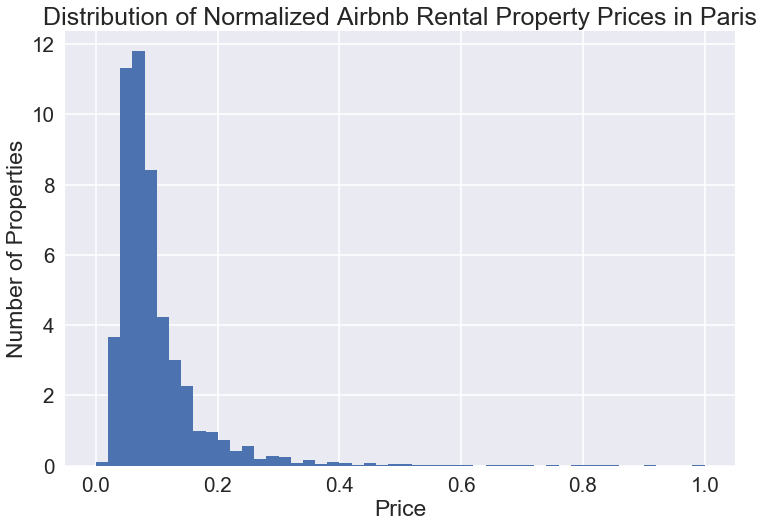

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(dfParis.price_norm,bins=50,normed=True)
ax.set_xlabel('Price')
ax.set_ylabel('Number of Properties')
ax.set_title('Distribution of Normalized Airbnb Rental Property Prices in Paris')
plt.show()

In [18]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    
    '''Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)'''
    
    lat1 = float(lat1)
    lon1 = float(lon1)
    lat2 = float(lat2)
    lon2 = float(lon2)
    #miles_constant = 3959
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    #haversine formula
    dlat = lat2 - lat2
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 3959
    mi = r * c
    return mi

In [20]:
###set columns for distance to attraction
for i, bnb in dfParis.iterrows():
    dist_to_attraction = []
    
    for j, site in df_attractions.iterrows():
        
        locitem = {}
        locitem['name'] = df_attractions.ix[j, 'name']
        #print(site['arrondissement'], site['attraction'])
        locitem['distance'] = haversine(dfParis.ix[i, 'latitude'], 
                                        dfParis.ix[i, 'longitude'],
                                         site['latitude'],site['longitude'])
        dfParis.loc[i, site['name']] = locitem['distance']
        dist_to_attraction.append(locitem)
        
    
    dist_sorted = sorted(dist_to_attraction, key = lambda i: (i['distance'], i['name']))    
    dfParis.ix[i,'closest_attraction'] = dist_sorted[0]['name']
    dfParis.ix[i,'attraction_dist'] = dist_sorted[0]['distance']
    if dist_sorted[0]['distance'] < 2.0:
        dfParis.ix[i,'close_to_attraction'] = 1
    else:
        dfParis.ix[i,'close_to_attraction'] = 0
    
    #print(sub02.ix[i,'latitude'])
    #sub02.ix[i,'new'] = float(sub02.ix[i,'latitude']) * 2

In [21]:
dfParis.head()

,accommodates,amenities,availability_30,availability_60,availability_90,bathrooms,bedrooms,beds,cancellation_policy,guests_included,...,Le Marais,Musee d'Orsay,Sainte-Chapelle,Palais Garnier - Opera,Notre Dame Cathedral,Musee de l'Orangerie,Pont Alexandre III,closest_attraction,attraction_dist,close_to_attraction
0,4,"TV,Internet,Wireless Internet,Kitchen,Elevator...",0,0,0,1,1.0,2.0,moderate,1,...,2.614807,1.150961,1.987516,1.378095,2.210333,0.973630,0.559959,Eiffel Tower,0.308310,1.0
1,4,"TV,Wireless Internet,Kitchen,Heating,Family/ki...",8,13,32,1,1.0,1.0,strict,1,...,2.764138,1.300227,2.136825,1.527354,2.359656,1.122883,0.709194,Eiffel Tower,0.159104,1.0
2,4,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",9,21,31,1,1.0,1.0,strict,2,...,1.362370,0.101444,0.735045,0.125839,0.957830,0.278726,0.692391,Musee d'Orsay,0.101444,1.0
3,2,"TV,Internet,Wireless Internet,Kitchen,Indoor f...",0,0,0,1,1.0,1.0,moderate,1,...,2.044433,0.580471,1.417071,0.807693,1.639893,0.403146,0.010559,Pont Alexandre III,0.010559,1.0
4,4,"TV,Wireless Internet,Kitchen,Elevator in build...",10,22,29,1,1.0,1.0,strict,1,...,2.442897,0.979093,1.815618,1.206242,2.038425,0.801773,0.388113,Pont Alexandre III,0.388113,1.0


In [22]:
dfParis.price.describe()

count    52295.000000
mean        93.718673
std         71.128178
min          0.000000
25%         55.000000
50%         75.000000
75%        105.000000
max        999.000000
Name: price, dtype: float64

In [23]:
dfParis.to_pickle('airbnb_paris_updt_0606.p')

#### This section is for getting distance between Airbnb property to RER station

In [132]:
for i, bnb in sub02.iterrows():
    dist_to_station = []  
    
    for j, rer in rer20.iterrows():
        
        item = {}
        #set the station name
        item['station'] = rer20.ix[j, 'nomptar']
        
        #get coord of station
        try:
            lat2, lon2 = rer20['coord'].iloc[j].split(',')
        except:
            print('error',lat2, lon2, j)
        #compute distance between airbnb property and metro stations
        item['distance']= haversine(sub02.ix[i,'latitude'], sub02.ix[i,'longitude'],
                          lat2, lon2)
        
        dist_to_station.append(item)
        
    #sort by 
    dist_sorted = sorted(dist_to_station, key = lambda i: (i['distance'], i['station']))
    #print(i)
    #print(dist_sorted['station'][0],dist_sorted['distance'][0])
   
    sub02.ix[i,'station1_name'] = dist_sorted[0]['station']
    sub02.ix[i,'station1_dist'] = dist_sorted[0]['distance']
    sub02.ix[i,'station2_name'] = dist_sorted[1]['station']
    sub02.ix[i,'station2_dist'] = dist_sorted[1]['distance']
    sub02.ix[i,'station3_name'] = dist_sorted[2]['station']
    sub02.ix[i,'station3_dist'] = dist_sorted[2]['distance']
    sub02.ix[i, 'station4_name'] = dist_sorted[3]['station']
    sub02.ix[i, 'station4_dist'] = dist_sorted[3]['distance']
    sub02.ix[i, 'station5_name'] = dist_sorted[5]['station']
    sub02.ix[i, 'station5_dist'] = dist_sorted[5]['distance']
    
    #set indicator to 1 if a station within 1.5 miles exist
    #a separate column will allow us to easily visualize properties with a station that
    #is walking distance from the airbnb property
    
    if dist_sorted[0]['distance'] < 1.5:
        sub02.ix[i, 'near_station'] = 1
    else:
        sub02.ix[i, 'near_station'] = 0


/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [133]:
sub02

,access,accommodates,amenities,availability_30,bathrooms,bedrooms,beds,cancellation_policy,cleaning_fee,guests_included,...,station1_dist,station2_name,station2_dist,station3_name,station3_dist,station4_name,station4_dist,station5_name,station5_dist,near_station
667,Enjoy unlimited high speed wireless internet ...,4,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",0,1,1.0,1.0,strict,100.0,1,...,0.020335,Anvers,0.293641,Tuileries,0.391225,Châtelet,0.465068,Jaurès,1.465321,1.0
669,The travelers have access to the multimedia wi...,2,"Cable TV,Wireless Internet,Kitchen,Smoking all...",0,1,0.0,1.0,strict,30.0,1,...,0.009874,Anvers,0.181192,Pigalle,0.495183,Tuileries,0.866173,Gare de Lyon,1.150181,1.0
670,There is digicode and two lifts in the bldg.,2,"TV,Internet,Wireless Internet,Kitchen,Doorman,...",14,1,0.0,1.0,strict,40.0,1,...,0.017255,Anvers,0.154059,Pigalle,0.468030,Tuileries,0.838991,Gare de Lyon,1.177241,1.0
671,Acces to the entire apartment + Balcony,6,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",25,2,3.0,3.0,strict,150.0,1,...,0.102146,Anvers,0.273434,Pigalle,0.587411,Jaurès,0.898238,Gare de Lyon,1.057843,1.0
672,NaN,6,"TV,Internet,Wireless Internet,Kitchen,Heating,...",8,2,2.0,3.0,strict,85.0,4,...,0.215487,Anvers,0.386746,Pigalle,0.700721,Jaurès,0.784918,Tuileries,1.071727,1.0
673,I'll be staying at the flat with you (sleeping...,3,"TV,Internet,Wireless Internet,Kitchen,Hot tub,...",0,1,1.0,2.0,flexible,NaN,2,...,0.063312,Anvers,0.234617,Pigalle,0.548609,Tuileries,0.919608,Gare de Lyon,1.096738,1.0
674,RER B les Halles 5 minutes walking from the fl...,4,"TV,Wireless Internet,Kitchen,Pets allowed,Heat...",11,1,2.0,2.0,moderate,30.0,1,...,0.045766,Châtelet,0.125575,Pigalle,0.359739,Tuileries,0.730684,Gare de Lyon,1.285584,1.0
675,NaN,2,"Internet,Wireless Internet,Kitchen,Smoking all...",0,1,1.0,1.0,flexible,20.0,1,...,0.059034,Anvers,0.254935,Châtelet,0.426347,Tuileries,0.429922,Jaurès,1.426585,1.0
676,By metro: line #3 station: sentier,3,"TV,Internet,Wireless Internet,Kitchen,Breakfas...",0,1,1.0,2.0,flexible,5.0,2,...,0.013740,Anvers,0.157578,Pigalle,0.471558,Tuileries,0.842530,Gare de Lyon,1.173758,1.0
677,"Travelers will feel at home, no special restri...",2,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",18,1,0.0,1.0,moderate,35.0,1,...,0.073636,Anvers,0.244931,Pigalle,0.558909,Jaurès,0.926745,Gare de Lyon,1.086362,1.0


In [ ]:

    sub02.ix[i, 'station4_name'] = dist_sorted[3]['station']
    sub02.ix[i, 'station4_dist'] = dist_sorted[3]['distance']
    sub02.ix[i, 'station5_name'] = dist_sorted[5]['station']
    sub02.ix[i, 'station5_dist'] = dist_sorted[5]['distance']

In [62]:
lis = [{'station':'champs', 'distance': 1.5},
       {'station':'chatelet', 'distance': 1.2},
       {'station':'goncourt', 'distance': 3.2},
       {'station':'republique', 'distance': 1.0},
      ]
sorted(lis, key = lambda i: (i['distance'], i['station']))

[{'distance': 1.0, 'station': 'republique'},
 {'distance': 1.2, 'station': 'chatelet'},
 {'distance': 1.5, 'station': 'champs'},
 {'distance': 3.2, 'station': 'goncourt'}]

In [95]:
rer = pd.read_csv('paris_rer/accessibilite-des-gares-et-stations-metro-et-rer-ratp.csv',sep=";")

In [96]:
rer.head()

,idptar,nomptar,STIF,CodeINSEE,X,Y,coord,UFR,AnnonceSonoreProchainPassage,AnnonceVisuelleProchainPassage,AnnonceSonoreSituationsPerturbees,AnnonceVisuelleSituationsPerturbees,PAQT,AccessibiliteQuaiTrain
0,2067,Bérault,1001100010001,94080,606737,2427450,"48.8453687094, 2.42824450629",0,1,1,1,1,0,0
1,1751,Porte de Vincennes,1001100010001,75120,605457,2427632,"48.8470164776, 2.410816879",0,1,1,1,1,0,0
2,1955,Gare de Lyon,1001100010001,75112,602713,2427468,"48.8455597463, 2.37344920163",0,1,1,1,1,0,0
3,2036,Châtelet,1001100010001,75101,600839,2428915,"48.8585696317, 2.3479332425",0,1,1,1,1,0,0
4,1856,Les Sablons (Jardin d'acclimatation),1001100010001,92051,595260,2431446,"48.8812991447, 2.27191517268",0,1,1,1,1,0,0


In [68]:
type(rer.coord.iloc[0])

str

In [70]:
lat, long = rer.coord.iloc[0].split(',')

In [71]:
print(lat, long)

48.8453687094  2.42824450629


In [97]:
print(len(rer))

955


In [98]:
rer_filtered = rer[['nomptar','coord']].drop_duplicates()
print(len(rer_filtered))

481


In [127]:
rer20 = rer_filtered.head(20).reset_index()

In [128]:
rer20

,index,nomptar,coord
0,0,Bérault,"48.8453687094, 2.42824450629"
1,1,Porte de Vincennes,"48.8470164776, 2.410816879"
2,2,Gare de Lyon,"48.8455597463, 2.37344920163"
3,3,Châtelet,"48.8585696317, 2.3479332425"
4,4,Les Sablons (Jardin d'acclimatation),"48.8812991447, 2.27191517268"
5,5,La Défense (Grande Arche),"48.8918267141, 2.23799203988"
6,7,Tuileries,"48.8647801217, 2.3290949511"
7,8,Porte Maillot,"48.8780061355, 2.28246563667"
8,9,Esplanade de la Défense,"48.8883580194, 2.24993720953"
9,10,Avron,"48.8511937784, 2.39823913749"


In [129]:
rer20['coord'][0].split(',')

['48.8453687094', ' 2.42824450629']

In [130]:
for x in range(20):
    print(rer20['nomptar'].iloc[x], rer20['coord'].iloc[x].split(','))

Bérault ['48.8453687094', ' 2.42824450629']
Porte de Vincennes ['48.8470164776', ' 2.410816879']
Gare de Lyon ['48.8455597463', ' 2.37344920163']
Châtelet ['48.8585696317', ' 2.3479332425']
Les Sablons (Jardin d'acclimatation) ['48.8812991447', ' 2.27191517268']
La Défense (Grande Arche) ['48.8918267141', ' 2.23799203988']
Tuileries ['48.8647801217', ' 2.3290949511']
Porte Maillot ['48.8780061355', ' 2.28246563667']
Esplanade de la Défense ['48.8883580194', ' 2.24993720953']
Avron ['48.8511937784', ' 2.39823913749']
Philippe Auguste ['48.8583788007', ' 2.38973472941']
Couronnes ['48.8693291287', ' 2.38053636283']
Jaurès ['48.882768506', ' 2.36994579566']
Anvers ['48.8828716494', ' 2.34416356947']
Monceau ['48.88057685', ' 2.30941594283']
Courcelles ['48.8792721109', ' 2.30329854335']
Victor Hugo ['48.8698648717', ' 2.28522620392']
Pigalle ['48.8824224877', ' 2.33725467877']
Ternes ['48.8782279997', ' 2.29812142925']
Père-Lachaise ['48.8629456209', ' 2.38689240121']


In [131]:
for j, rer in rer20.iterrows():
        
    item = {}
        #set the station name
    item['station'] = rer20.ix[j, 'nomptar']
        
        #get coord of station
    print(j)
    try:
        lat2, lon2 = rer20['coord'].loc[j].split(',')
        print(rer20['nomptar'].loc[j], rer20['coord'].loc[j] )


    except:
        print('error',j)

0
Bérault 48.8453687094, 2.42824450629
1
Porte de Vincennes 48.8470164776, 2.410816879
2
Gare de Lyon 48.8455597463, 2.37344920163
3
Châtelet 48.8585696317, 2.3479332425
4
Les Sablons (Jardin d'acclimatation) 48.8812991447, 2.27191517268
5
La Défense (Grande Arche) 48.8918267141, 2.23799203988
6
Tuileries 48.8647801217, 2.3290949511
7
Porte Maillot 48.8780061355, 2.28246563667
8
Esplanade de la Défense 48.8883580194, 2.24993720953
9
Avron 48.8511937784, 2.39823913749
10
Philippe Auguste 48.8583788007, 2.38973472941
11
Couronnes 48.8693291287, 2.38053636283
12
Jaurès 48.882768506, 2.36994579566
13
Anvers 48.8828716494, 2.34416356947
14
Monceau 48.88057685, 2.30941594283
15
Courcelles 48.8792721109, 2.30329854335
16
Victor Hugo 48.8698648717, 2.28522620392
17
Pigalle 48.8824224877, 2.33725467877
18
Ternes 48.8782279997, 2.29812142925
19
Père-Lachaise 48.8629456209, 2.38689240121


/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [126]:
len(rer20)

20